In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem


Generate a dataframe of SMC dft dataset

In [301]:
#Preparing to match dft data to ligands we use in smc
df_allwithrules = pd.read_excel('P_selected_reframe.xlsx', engine = 'openpyxl', sheet_name='_cmcl_')
df_SMC = pd.read_excel('P_selected_reframe.xlsx', engine = 'openpyxl', sheet_name='SMC_vburmin32_noBuch')
df_Pool = pd.read_excel('P_selected_reframe.xlsx', engine = 'openpyxl', sheet_name='Pool')
df_all = pd.read_excel('allligands_dft_data_210125.xlsx', engine = 'openpyxl', sheet_name='allligands_dft_data_210125')

frame = [df_allwithrules,df_SMC,df_Pool]
df_origin = pd.concat(frame)
#Turing smiles from smc to inchi
#smc_inchi = smc_df['Smiles'].map(Chem.MolFromSmiles).map(Chem.MolToInchi)

In [302]:
#Clean up dft data by lookup from dft_all
#df_allwithrules = df_all.loc[df_all['ID'].isin(df_allwithrules['ID'])]
#df_SMC = df_all.loc[df_all['ID'].isin(df_SMC['ID'])]
#df_Pool = df_all.loc[df_all['ID'].isin(df_Pool['ID'])]

df_allwithrules = df_allwithrules.loc[df_allwithrules['ID'].isin(df_all['ID'])]
df_SMC = df_SMC.loc[df_SMC['ID'].isin(df_all['ID'])]
df_Pool = df_Pool.loc[df_Pool['ID'].isin(df_all['ID'])]

#Drop Dublicates
df_allwithrules = df_allwithrules.loc[~df_allwithrules['ID'].isin(df_SMC['ID'])]
df_allwithrules = df_allwithrules.loc[~df_allwithrules['ID'].isin(df_Pool['ID'])]
#Those two dataframe shouldn't have overlap
df_wtf = df_Pool.loc[df_Pool['ID'].isin(df_SMC['ID'])]
print('Weird warning dataframe:', df_wtf.shape)

df_allwithrules['Priority'] = 0
df_SMC['Priority'] = 1
df_Pool['Priority'] = 2
df_allwithrules['Label'] = 'All'
df_SMC['Label'] = 'SMC screened'
df_Pool['Label'] = 'Pool'

#Concate them into one dataframe
frame = [df_allwithrules,df_SMC,df_Pool]
df = pd.concat(frame)

Weird warning dataframe: (0, 219)


In [303]:
df_allwithrules.shape

(210, 202)

In [304]:
df_SMC.shape

(56, 230)

In [305]:
df_Pool.shape

(22, 220)

In [306]:
df

,Unnamed: 0,SMILES,ID,buch,x1,x2,x3,x4,x5,x6,...,LUMO_else,dipole_below3,dipole_above3,sterimolB5_6,sterimolB5_7,sterimolB5_else,pred_451182,pred_281777,TooSmallOrRedundant_no,Maybe
0,269,Oc1ccc(P(c2ccccc2)c2ccccc2)cc1,275,NaN,-0.049778,1.840157,-0.223190,-0.028370,-0.125780,0.194820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,356,COc1cc(C(C)(C)C)cc(C(C)(C)C)c1-c1ccccc1P(C1CCC...,368,NaN,-0.060689,1.810071,-0.213519,-0.016677,-0.115098,0.196842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,386,c1ccc(P2CCCC2)cc1,398,NaN,-0.053656,1.846617,-0.228732,-0.018851,-0.123791,0.209881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,256,CC(C)(C)Oc1ccc(P(c2ccc(OC(C)(C)C)cc2)c2ccc(OC(...,261,NaN,-0.053675,1.839264,-0.216592,-0.022531,-0.119561,0.194061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1219,Cc1ccc(P(c2ccc(C)cc2)c2ccccc2C)cc1,1504,NaN,-0.050555,1.840777,-0.221593,-0.025815,-0.123704,0.195778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,676,CCO[Si](CCCP(c1ccccc1)c1ccccc1)(OCC)OCC,728,NaN,-0.050977,1.830649,-0.228048,-0.029259,-0.128653,0.198788,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
18,68,CN(C)c1ccc(P(C2CCCCC2)C2CCCCC2)cc1,69,NaN,-0.067644,1.797959,-0.203440,-0.007551,-0.105495,0.195888,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
19,456,C1CCN(P(N2CCCC2)N2CCCC2)C1,472,NaN,-0.061916,1.802160,-0.203469,0.029344,-0.087063,0.232813,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
20,1148,c1ccc(CCP(c2ccccc2)c2ccccc2)cc1,1408,NaN,-0.050397,1.842205,-0.229283,-0.030181,-0.129732,0.199102,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Clean up the data
 - clear up non values
 - dropping zero-variance features and similar features

In [307]:
#Arbitrarily assign 0 value to all NaN spaces
df.replace(np.nan, 0)
df = df.sample(frac=1,random_state=42)
df_origin2 = df
#Dropping some of the incomplete/useless parts of dataset
df_y=df[['ID','Label','Priority']]
try:
    df = df.drop(columns = ['SMILES','y1','y2','y3','y4','buch'])
    df = df.drop(columns = ['y6','y10','y11','y12','y13','y14','y17'])
    df = df.drop(columns = ['y15','y16','y18','y19','y5','y7','y8','y9'])
    df = df.drop(columns = ['y1','y2','y11','y12','y13','y14','y16','SMILES','x198'])
except:
    pass
df.to_excel("output.xlsx")  


In [308]:
df.fillna(0)
df=df.drop(columns = ['Priority','Label'])

In [309]:
#df=df.drop(columns = ['x199','x200','x201','x202','Unnamed: 0'])

In [310]:
# drop highly correlated features
df_corr = df.corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(to_drop, axis=1)
print (f"Dropping {len(to_drop)} features {to_drop}")

Dropping 63 features ['ID', 'x7', 'x11', 'x22', 'x39', 'x40', 'x41', 'x48', 'x49', 'x61', 'x63', 'x64', 'x71', 'x72', 'x73', 'x74', 'x75', 'x81', 'x82', 'x83', 'x84', 'x85', 'ID.2', 'x86', 'x87', 'x89', 'x90', 'x94', 'x96', 'x99', 'x100', 'x107', 'x108', 'x110', 'x111', 'x113', 'x114', 'x119', 'x124', 'x127', 'x130', 'x134', 'x135', 'x136', 'x137', 'x138', 'x140', 'x142', 'x145', 'x148', 'x149', 'x150', 'x151', 'x152', 'x153', 'x155', 'x158', 'x159', 'x192', 'ID.1', 179.59438003021648, 'x196', 'x197']


c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [311]:
df = df.dropna(axis='columns')

In [312]:
df

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x8,x9,x10,...,x183,x184,x185,x186,x187,x188,x189,x190,x191,x193
55,1153,-0.037385,1.933317,-0.239370,-0.048850,-0.144110,0.190520,0.066660,-0.419780,0.800020,...,6.095896,0.000000,6.095896,6.866095,6.866095,6.866095,0.000000,6.866095,1,7.077750
191,440,-0.057126,1.810260,-0.233938,-0.024628,-0.129283,0.209311,0.081224,-0.406764,0.750734,...,7.480192,1.461541,6.028339,7.229815,6.505556,7.767850,1.262294,7.443091,61,926.348167
46,578,-0.043693,1.865147,-0.229987,-0.070578,-0.150282,0.159409,0.029648,-0.377364,0.790507,...,7.016997,0.005771,7.016997,6.969839,6.967974,7.010857,0.042883,6.967974,2,103.359417
52,423,-0.045549,1.836945,-0.228017,-0.032779,-0.130398,0.195239,0.056813,-0.385342,0.793413,...,6.930974,0.884542,6.057383,6.988636,6.947848,7.776914,0.829065,7.581699,14,479.997278
222,156,-0.052360,1.837829,-0.230131,-0.027559,-0.128845,0.202571,0.066464,-0.402483,0.790604,...,6.098398,0.054552,6.068041,7.195906,7.016049,7.261276,0.245227,7.252243,10,254.824111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,242,-0.061707,1.790887,-0.215422,0.033105,-0.091158,0.248527,0.114597,-0.404113,1.131036,...,5.769111,0.503351,5.680602,6.921629,6.560616,7.384577,0.823961,6.755425,35,460.304139
88,1210,-0.043751,1.887777,-0.261871,0.015420,-0.123226,0.277292,0.124242,-0.535596,0.230335,...,4.569579,0.029531,4.569579,6.546102,5.989500,7.069375,1.079875,7.069375,2,1.373972
130,708,-0.048947,1.858214,-0.224654,-0.029139,-0.126897,0.195515,0.058798,-0.368572,0.799064,...,7.016861,0.985664,6.031197,6.983154,6.919604,7.017685,0.098081,7.017685,13,841.248111
4,56,-0.055985,1.809874,-0.218619,-0.020201,-0.119410,0.198418,0.082873,-0.380705,1.155110,...,6.050389,0.366344,6.029363,6.825906,6.765827,7.532501,0.766674,7.285394,31,646.969444


UMAP Dimension Reduction to 2

In [313]:
from sklearn.decomposition import PCA
from umap import UMAP
# define the dimensionalities of the reduced representation to study
dims = [ 50, 30, 20, 10, 5, 2]
# dictionary to store data at different levels of dimensionality reduction
dfs={}
# UMAP section
n_neighbors = np.int(np.sqrt(df.shape[1]))
for dim in dims:
    key = f"umap{dim}"
    dfs[key] = pd.DataFrame(UMAP(n_components=dim, n_neighbors=n_neighbors).fit_transform(df), index=df.index)
# PCA section
pc = pd.DataFrame(PCA(n_components=None).fit_transform(df), index=df.index)
for dim in dims:
    key = f"pc{dim}"
    dfs[key] = pc.iloc[:, :dim]

c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


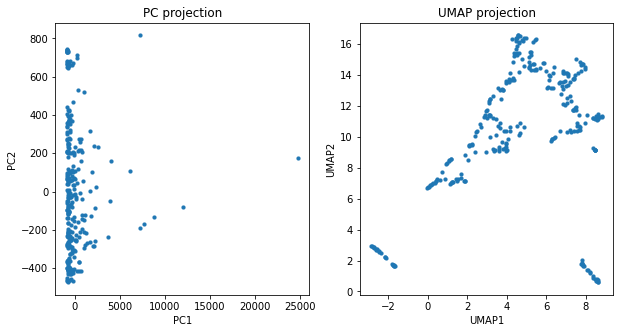

In [314]:
# Visualize the embeddings
f, ax = plt.subplots(1, 2, figsize=(10, 5)) #, dpi=200)
dfs['pc2'].columns = ['PC1', 'PC2']
dfs['umap2'].columns = ['UMAP1', 'UMAP2']
_= sns.scatterplot(x='PC1', y='PC2', data=dfs['pc2'], s=15, alpha=1, linewidth=0.25,  edgecolor='face', ax=ax[0]).set_title("PC projection")
_=sns.scatterplot(x='UMAP1', y='UMAP2', data=dfs['umap2'], s=15, alpha=1, linewidth=0.25, edgecolor='face', ax=ax[1]).set_title("UMAP projection")

Clustering

In [315]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata
from sklearn.metrics import silhouette_score
# Define the numbeor of clusters to study
N_CLS_list = list(range(5, 41))
def silhouette_scores_hierarchical(data, n_cls_list):
 """helper function to compute a silhouette score for hierarchical cluster
ing using Ward linkage"""
 
 z = linkage(data, method='ward')
 
 result = pd.Series(index=n_cls_list, dtype=float)
 for n_cls in n_cls_list:
    cls = fcluster(z, n_cls, criterion='maxclust')
    result.loc[n_cls] = silhouette_score(data, cls)
 return result


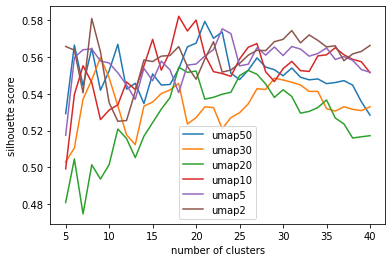

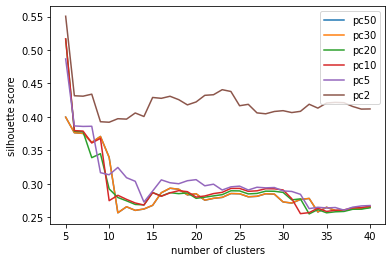

In [316]:
# populate silhouette scores for all number of clusters and all dimensionality reductions that are pre-calculated
silh_scores = pd.DataFrame(index=N_CLS_list)
for key, value in dfs.items():
    silh_scores[key] = silhouette_scores_hierarchical(value, N_CLS_list)
# plot the silhouette scores
_=silh_scores.groupby(silh_scores.columns.str.startswith('pc'), axis=1).plot(
xlabel='number of clusters',ylabel='silhouette score')


Final Clustering

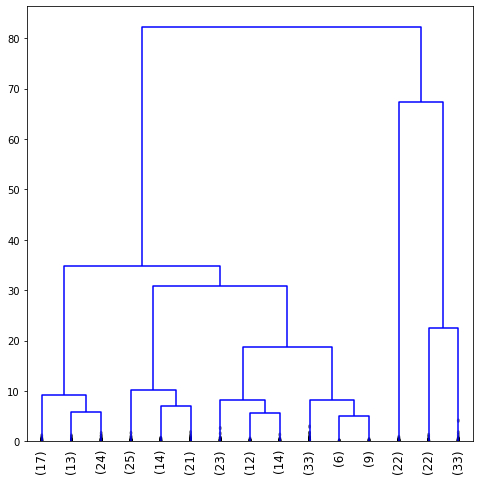

In [317]:
# final number of clusters to produce
NCLS = 15
# linkage and clustering for selected featurization
z = linkage(dfs['umap10'], method="ward")
cls = fcluster(z, NCLS, criterion='maxclust')
# plot the dendrogram
plt.figure(figsize=(8, 8))
_=dendrogram(z, truncate_mode='lastp', p=NCLS, show_contracted=True, leaf_rotation=90, color_threshold=0)


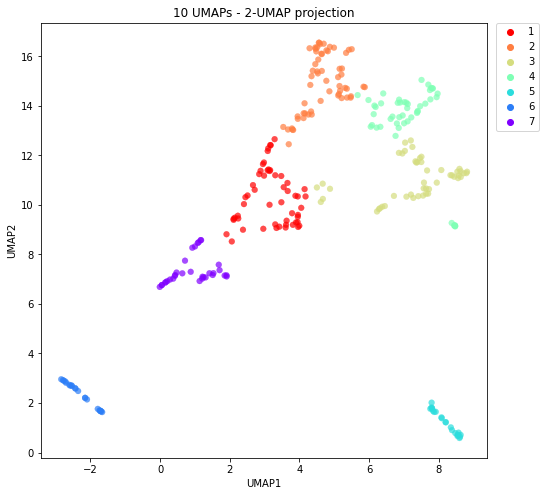

In [318]:
# plot clustering
NCLS = 7
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="UMAP1", y="UMAP2", data=dfs['umap2'], s=35, alpha=0.7, linewidth=0.25, edgecolor='face',
 palette='rainbow_r', legend='full', hue=cls).set_title("10 UMAPs - 2-UMAP projection")
_=plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


In [319]:
df['Label']=df_y['Label']
df['Priority']=df_y['Priority']

In [320]:
df.fillna('not assigned')

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x8,x9,x10,...,x185,x186,x187,x188,x189,x190,x191,x193,Label,Priority
55,1153,-0.037385,1.933317,-0.239370,-0.048850,-0.144110,0.190520,0.066660,-0.419780,0.800020,...,6.095896,6.866095,6.866095,6.866095,0.000000,6.866095,1,7.077750,All,0
191,440,-0.057126,1.810260,-0.233938,-0.024628,-0.129283,0.209311,0.081224,-0.406764,0.750734,...,6.028339,7.229815,6.505556,7.767850,1.262294,7.443091,61,926.348167,All,0
46,578,-0.043693,1.865147,-0.229987,-0.070578,-0.150282,0.159409,0.029648,-0.377364,0.790507,...,7.016997,6.969839,6.967974,7.010857,0.042883,6.967974,2,103.359417,SMC screened,1
52,423,-0.045549,1.836945,-0.228017,-0.032779,-0.130398,0.195239,0.056813,-0.385342,0.793413,...,6.057383,6.988636,6.947848,7.776914,0.829065,7.581699,14,479.997278,All,0
222,156,-0.052360,1.837829,-0.230131,-0.027559,-0.128845,0.202571,0.066464,-0.402483,0.790604,...,6.068041,7.195906,7.016049,7.261276,0.245227,7.252243,10,254.824111,All,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,242,-0.061707,1.790887,-0.215422,0.033105,-0.091158,0.248527,0.114597,-0.404113,1.131036,...,5.680602,6.921629,6.560616,7.384577,0.823961,6.755425,35,460.304139,All,0
88,1210,-0.043751,1.887777,-0.261871,0.015420,-0.123226,0.277292,0.124242,-0.535596,0.230335,...,4.569579,6.546102,5.989500,7.069375,1.079875,7.069375,2,1.373972,All,0
130,708,-0.048947,1.858214,-0.224654,-0.029139,-0.126897,0.195515,0.058798,-0.368572,0.799064,...,6.031197,6.983154,6.919604,7.017685,0.098081,7.017685,13,841.248111,All,0
4,56,-0.055985,1.809874,-0.218619,-0.020201,-0.119410,0.198418,0.082873,-0.380705,1.155110,...,6.029363,6.825906,6.765827,7.532501,0.766674,7.285394,31,646.969444,Pool,2


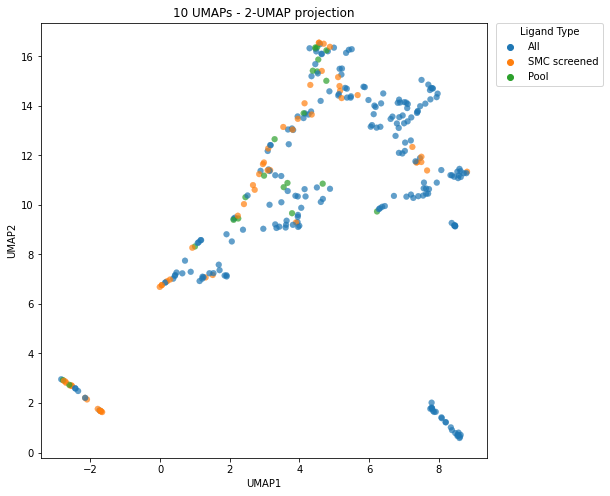

In [321]:
# plot clustering
NCLS = 7
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="UMAP1", y="UMAP2", data=dfs['umap2'], s=35, alpha=0.7, linewidth=0.25, edgecolor='face',
  legend='full', hue=df['Label']).set_title("10 UMAPs - 2-UMAP projection")
_=plt.legend(title='Ligand Type',bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#,labels=['No','Screened Aromatic', 'Screened Alkyl','Maybe','Priority']


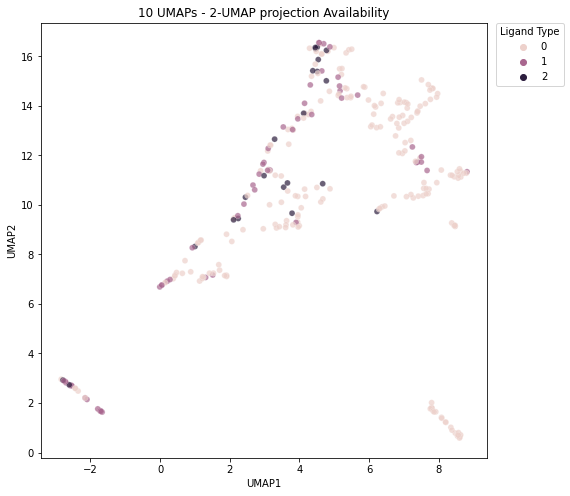

In [322]:
# plot clustering
NCLS = 7
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="UMAP1", y="UMAP2", data=dfs['umap2'], s=35, alpha=0.7, linewidth=0.25,
  hue=df['Priority']).set_title("10 UMAPs - 2-UMAP projection Availability")
_=plt.legend(title='Ligand Type',bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#,labels=['No','Screened Aromatic', 'Screened Alkyl','Maybe','Priority']

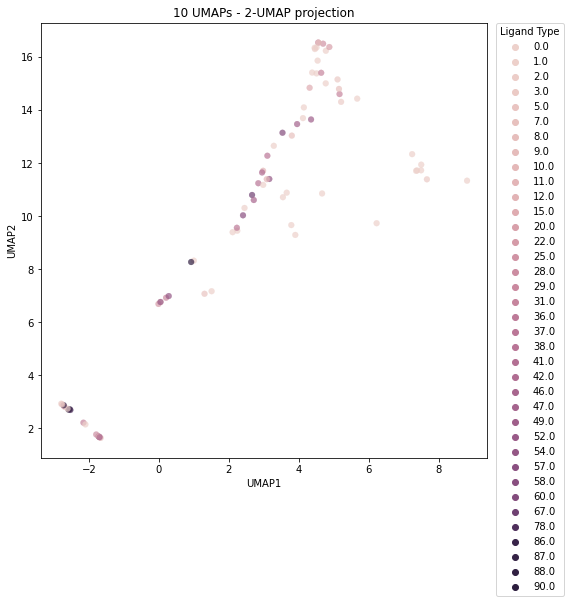

In [326]:
# plot clustering
NCLS = 7
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="UMAP1", y="UMAP2", data=dfs['umap2'], s=35, alpha=0.7, linewidth=0.25, edgecolor='face',
  legend='full', hue=df_origin2['x198']).set_title("10 UMAPs - 2-UMAP projection")
_=plt.legend(title='Ligand Type',bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#labels=['Probably not','Screened Aromatic', 'Screened Alkyl','Maybe','Priority']

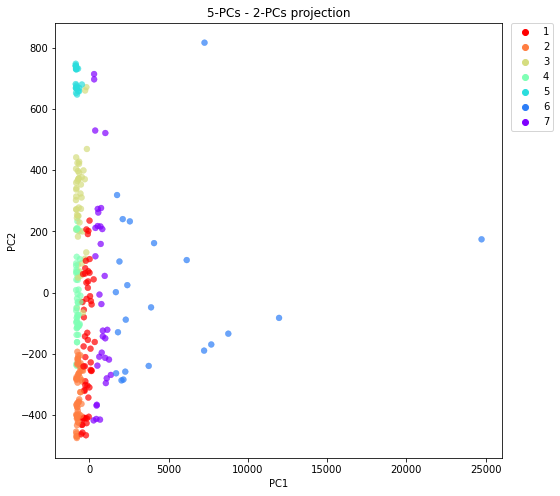

In [324]:
# plot clustering
NCLS = 7
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="PC1", y="PC2", data=dfs['pc2'], s=35, alpha=0.7, linewidth=0.4, edgecolor='face',
 palette='rainbow_r', legend='full', hue=cls).set_title("5-PCs - 2-PCs projection")
_=plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

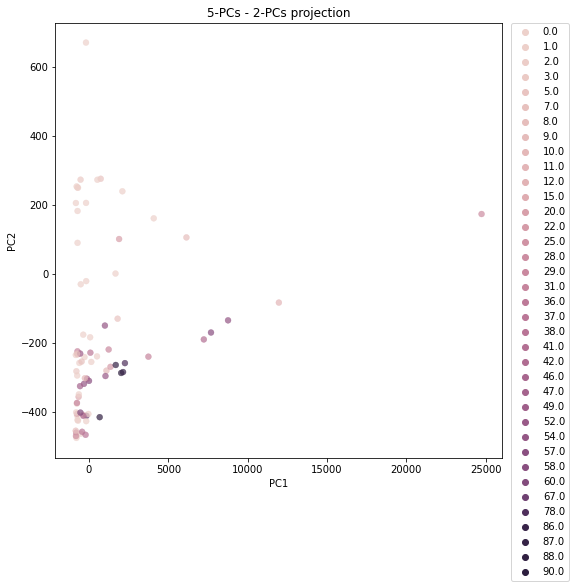

In [327]:
# plot clustering
NCLS = 7
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="PC1", y="PC2", data=dfs['pc2'], s=35, alpha=0.7, linewidth=0.4, edgecolor='face',
 legend='full', hue=df_origin2['x198']).set_title("5-PCs - 2-PCs projection")
_=plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [331]:
def generate_ligand_data(df):
    #Convert the smiles of ligand to a dataframe.
    df = df.copy()
    rxns = []
    smiles = df_origin2['SMILES']
    for i in smiles:
        try:
            ligand_smiles = Chem.MolFromSmiles(i)
            rxns.append(ligand_smiles)
        except:
            print(i)
        
    return rxns

Cluster 1, n molecules: 54


[04:48:06] Explicit valence for atom # 7 B, 6, is greater than permitted


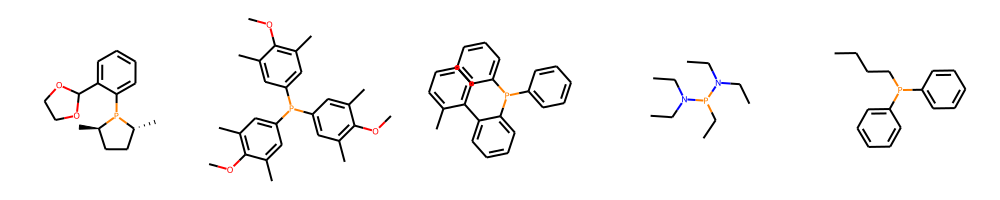

Cluster 2, n molecules: 60


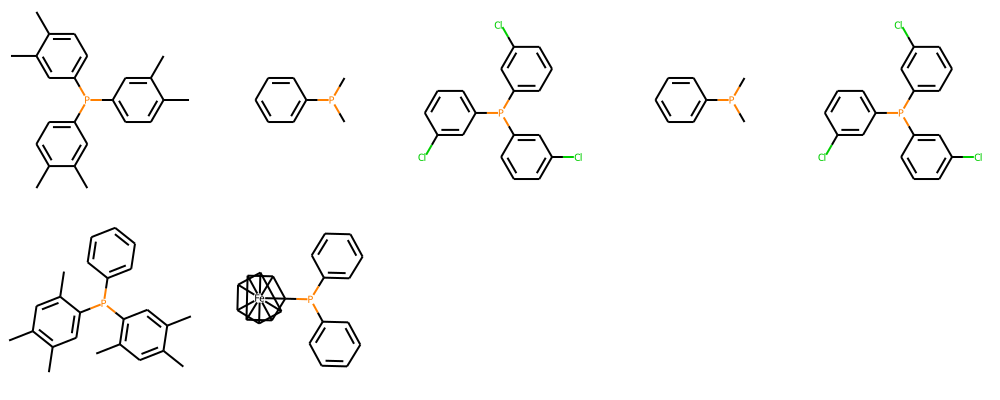

Cluster 3, n molecules: 49


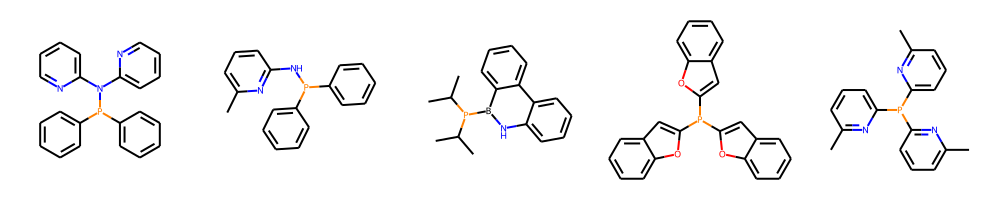

Cluster 4, n molecules: 48


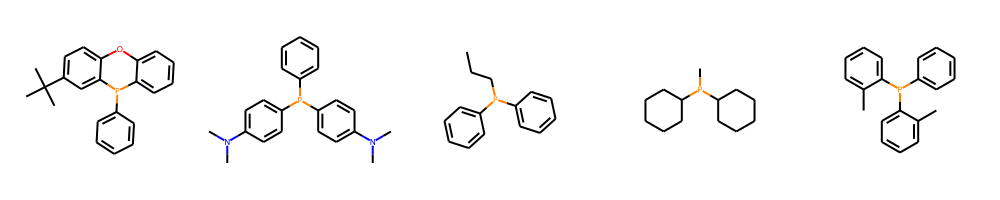

Cluster 5, n molecules: 22


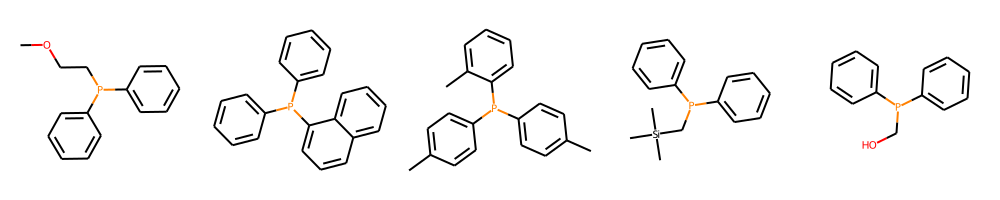

Cluster 6, n molecules: 22


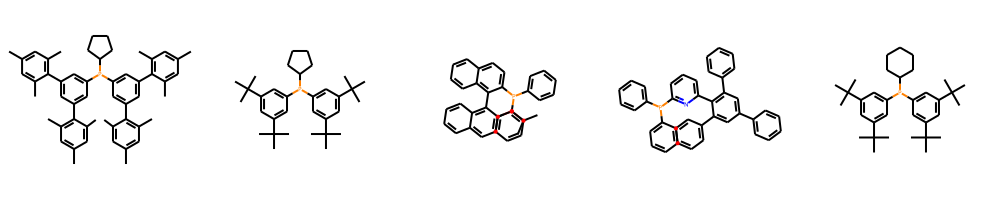

Cluster 7, n molecules: 33


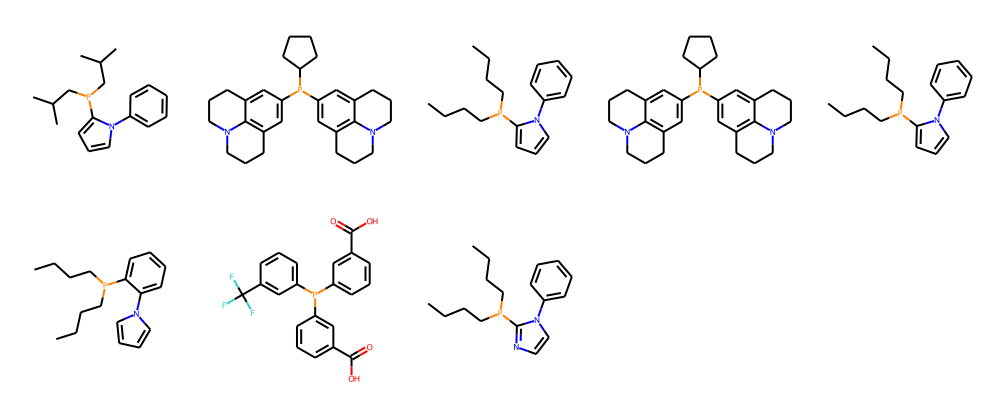

In [333]:
from scipy.spatial.distance import cdist
from rdkit.Chem import Draw
# build rdkit molecules for all candidates
df = df
df['mol'] = generate_ligand_data(df)
mols = pd.Series(((df['mol'])), index=df.index).to_frame('mol')
features='umap2'
# How many central molecules to display?
n_per_cluster = 5
# store central candidates for 
cands=[]
for group, data in mols.groupby(cls):
 # get descriptor data for this cluster
 desc_data=dfs[features].loc[data.index]
 
 # compute distances of these molecules to their center
 dists=pd.Series(cdist([desc_data.mean()], desc_data)[0],
 index=desc_data.index)
 # select top n central molecules
 selected=dists.sort_values().head(n_per_cluster).index
 
 smi=mols.loc[selected]['mol'].map(Chem.MolToSmiles)
 smi=smi.reset_index(drop=True).to_frame(f"Cluster{group}")
 cands.append(smi)
 
 print (f"Cluster {group}, n molecules: {len(data)}")
 ms = data['mol'].loc[selected]
 display(Draw.MolsToGridImage(ms, molsPerRow=n_per_cluster))
 
cands = pd.concat(cands, axis=1)

In [ ]:
cands

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7
0,CN(C)c1ccccc1-c1ccccc1P(C1CCCCC1)C1CCCCC1,CC(C)(C)c1ccc(P(c2ccc(C(C)(C)C)cc2)c2ccc(C(C)(...,CC(C)(C)P(C#COc1ccccc1)C(C)(C)C,CC(C)N(C(C)C)P(c1ccc2c(c1)OCO2)c1ccc2c(c1)OCO2,c1ccc([Si]23CCP(CC2)CC3)cc1,CC(C)Oc1ccc2ccccc2c1-c1c(P(c2ccccc2)c2ccccc2)c...,C[Sn](C)(C)CCCP(C1CCCCC1)C1CCCCC1
1,COc1ccccc1-c1ccccc1P(C1CCCCC1)C1CCCCC1,O=S(=O)(O)c1cccc(P(c2ccccc2)c2ccccc2)c1,FC(F)(F)COP(c1ccccc1)c1ccccc1,CC(C)CN1CC2(C)CN(CC(C)C)P1N(CC(C)C)C2,c1cc2n(c1)P1n3cccc3C2c2cccn21,COc1cccc(OC)c1Cc1ccccc1CP(C1CCCCC1)C1CCCCC1,c1ccc(NCP(CNc2ccccc2)CNc2ccccc2)cc1
2,COC(=O)c1ccc(C(=O)Oc2c(F)c(F)c(F)c(F)c2F)cc1P(...,c1ccc(-c2ccc(P(c3ccc(-c4ccccc4)cc3)c3ccc(-c4cc...,FC(F)(F)C(OP(c1ccccc1)c1ccccc1)C(F)(F)F,C1CCC(P(N2CCCCC2)N2CCCCC2)CC1,CC1(C)[C@H](C)C(C)(C)[P@@]1C,COc1cccc(OC)c1Cc1ccccc1CP(C1CCCCC1)C1CCCCC1,COc1cccc(OC)c1-c1ccccc1-p1c2ccccc2c2ccccc21
3,Cc1ccccc1-c1ccccc1P(C1CCCCC1)C1CCCCC1,COC(=O)c1ccc(P(c2ccc(C(=O)OC)cc2)c2ccc(C(=O)OC...,FC(F)(F)COP(OCC(F)(F)F)c1ccccc1,C1CCN(P(N2CCCCC2)N2CCOCC2)CC1,FC(F)(F)P(c1ccccc1)c1ccccc1,CC(C)c1ccccc1OP(Oc1ccccc1C(C)C)Oc1ccccc1C(C)C,c1cc(CCP(CCc2ccncc2)CCc2ccncc2)ccn1
4,c1ccc(P(C2CCCCC2)C2CCCCC2)c(-n2c3ccccc3c3ccccc...,CC(C)c1ccc(P(c2ccc(C(C)C)cc2)c2ccc(C(C)C)cc2)cc1,CCCCP(CCCC)OC,CC(C)c1cc(C(C)C)cc(P(c2ccc(C(F)(F)F)cc2)c2ccc(...,CC1(C)[C@H](C)C(C)(C)[P@]1C,CCO[Si](CCCP(c1ccccc1)c1ccccc1)(OCC)OCC,C=CCCCCP(CCCCC=C)CCCCC=C
5,c1ccc(OCP(COc2ccccc2)COc2ccccc2)cc1,c1ccc(CN2C[C@@H]3C[C@H]2C[P@]3c2ccccc2)cc1,CCCCP(C(C)C)C(C)C,C1CCN(P(N2CCOCC2)N2CCOCC2)CC1,CCCCp1cc(C)c(C)c1,c1ccc(-c2ccccc2OP(Oc2ccccc2-c2ccccc2)Oc2ccccc2...,CC(C)c1nc(P(c2ncc[nH]2)c2nc(C(C)C)c(C(C)C)[nH]...
6,CC(C)(C)Oc1ccc(P(c2ccc(OC(C)(C)C)cc2)c2ccc(OC(...,Cc1ccc(S(=O)(=O)N2C[C@@H]3C[C@H]2C[P@@]3c2ccc(...,CCP(CC)C1CCCCC1,c1cc2c(c(P(c3cccc4c3OCO4)c3cccc4c3OCO4)c1)OCO2,FC(F)(F)CP(CC(F)(F)F)CC(F)(F)F,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)[C...,CC(C)(C)c1ccc(P(c2ccc(C(C)(C)C)s2)c2ccc(C(C)(C...
7,Cc1ccccc1OP(Oc1ccccc1C)Oc1ccccc1C,Cc1ccc(S(=O)(=O)N2C[C@@H]3C[C@H]2C[P@]3c2ccc(F...,CCP(CC)c1c(F)c(F)c(F)c(F)c1F,CC(C)(C)COP(OCC(C)(C)C)OCC(C)(C)C,C[Si](C)(C)P1C2CCCC1CCC2,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)C2...,CC(C)(CCc1ccccc1)P(c1ccccc1)c1ccccc1


# Plotting 3d diagram of the ligand awaited screening

In [ ]:
def plot_three_features(df_x,i,j,k):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    n=100
    ax.scatter(df_x[i],df_x[j],df_x[k],c=df['Priority'])
    ax.set_xlabel(i)
    ax.set_ylabel(j)
    ax.set_zlabel(k)
    print("A plot of axis:",i, j, ", and ",k)
    plt.show()

A plot of axis: x4 x51 , and  x182


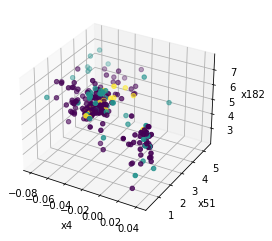

In [ ]:
plot_three_features(df,'x4','x51','x182')

In [ ]:
# Plot a diagram from angle a, b with yields. Remember to use df_origin and df_origin['x198'-'x202'] as input. 
# You can use df_x and df_y, but check and compare the index before use.
def plot_three_features_anydir(df_x,i,j,k,df_y,a,b):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    n=100
    ax.scatter(df_x[i],df_x[j],df_x[k],c=df_y)
    ax.set_xlabel(i)
    ax.set_ylabel(j)
    ax.set_zlabel(k)
    print("A plot of axis:",i, j, ", and ",k)
    # rotate the axes by angles you want
    ax.view_init(a,b)
        
    plt.show()

A plot of axis: x4 x51 , and  x182


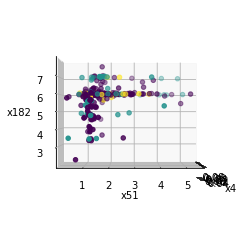

A plot of axis: x4 x51 , and  x182


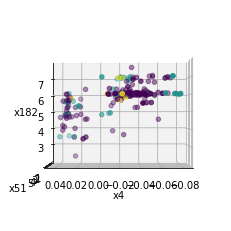

A plot of axis: x4 x51 , and  x182


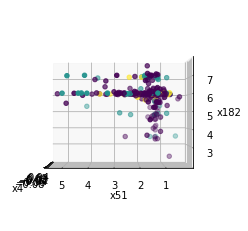

A plot of axis: x4 x51 , and  x182


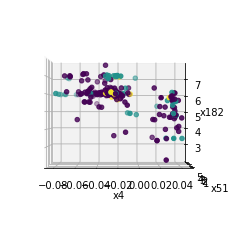

In [ ]:
# Plot 'fraction=12' number of diagrams from different angles, rotating 360/fraction degrees at a time.
blist=[]
a=0
fraction = 4
for i in range(0,fraction):
    blist.append(i*(360/fraction))
for i in blist:
    plot_three_features_anydir(df,'x4','x51','x182',df['Priority'],a,i)